# Notebook Instructions

1. If you are new to Jupyter notebooks, please go through this introductory manual <a href='https://quantra.quantinsti.com/quantra-notebook' target="_blank">here</a>.
1. Any changes made in this notebook would be lost after you close the browser window. **You can download the notebook to save your work on your PC.**
1. Before running this notebook on your local PC:<br>
i.  You need to set up a Python environment and the relevant packages on your local PC. To do so, go through the section on "**Python Installation**" in the course.<br>
ii. You need to **download the zip file available in the last unit** of this course. The zip file contains the data files and/or python modules that might be required to run this notebook.

# Calculating Daily and Cumulative Returns for a Stock

In this notebook, you will first read the price data of a stock and calculate its daily as well as total returns. You will also plot these returns and check if daily returns can be added to give total returns. Further, you will calculate the cumulative returns of the stock to explain the journey of the stock return.

After completing the notebook, you will be able to
1. Calculate and plot daily and total returns 
2. Test the additive properties of cumulative returns


In this notebook, you will perform the following steps:

1. [Read and plot the close price data](#read)
3. [Calculate one day return](#one)
4. [Calculate total return](#total)
5. [Calculate and plot daily returns](#daily)
6. [Are daily returns time additive?](#time)
7. [Calculate cumulative returns](#cumulative)
8. [Cumulative arithmetic returns vs compounded returns](#plot)
9. [Conclusion](#tweak)
    
<a id='read'></a> 
## Read and plot the close price data
The price data for Twitter is stored in the CSV file. The CSV file contains the price data of Twitter from 30 June to 29 July 2020. To read a CSV file, you can use `read_csv` method of `pandas`. The syntax is shown below.

Syntax: 
```python
import pandas as pd
pd.read_csv(filename,index_col)
```
1. **filename**: name of the file in the string format
2. **index_col**: the column number to set as index

In [2]:
## -------- Import the necessary libraries -------------
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('seaborn-darkgrid')
## -------- Read the data -------------
# The data is stored in the directory 'data_modules'
path = '../data_modules/'
data = pd.read_csv(path + 'twitter_price_2020.csv', index_col=0)
# Display first five rows of price data
data.head()

,Open,High,Low,Close,Volume
Date,,,,,
2020-06-30,29.629999,29.820000,29.020000,29.790001,20648000
2020-07-01,30.150000,31.170000,30.059999,30.809999,20779000
2020-07-02,31.299999,31.400000,30.400000,30.870001,14553700
2020-07-06,31.549999,32.810001,31.160000,32.340000,22400000
2020-07-07,31.959999,33.669998,31.770000,32.990002,27940900


To plot the closing price of Twitter, you will use the matplotlib python library. The syntax is shown below:

Syntax: 
```python
import matplotlib.pyplot as plt
dataframe.column.plot(figsize,color)
```
1. **figsize**: set size of x and y axis
2. **color**: set color for line

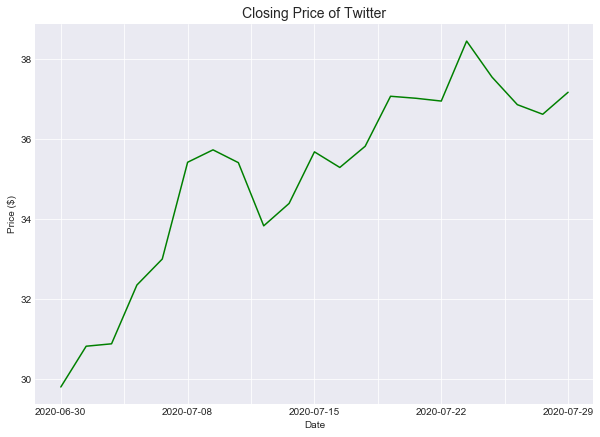

In [3]:
# Plotting the Close price column
data.Close.plot(figsize=(10, 7), color='green')
# Setting the graph title
plt.title("Closing Price of Twitter", fontsize=14)
# Setting the y axis title
plt.ylabel('Price ($)')
# Function for showing graph
plt.show()

<a id='one'></a>
## Calculate one day return

You will first calculate the return for one day. If you had bought the stock of Twitter on the close of 30 June and sold it on the close of next day ie July 1, you can calculate your return in the following manner.
$$\text{One day Return} =\frac{(\text{Today's Price - Yesterday's Price)}}{\text{Yesterday's Price}} = \frac{\text{Today's Price}}{\text{Yesterday's Price}}-1$$

To convert it into percentage format, you will multiply the `one_day_returns` with 100.

In [4]:
one_day_returns = data.Close[1]/data.Close[0]-1
'The returns in percentage terms are %.2f%%' % (one_day_returns*100)

'The returns in percentage terms are 3.42%'

<a id='total'></a>
## Calculate total returns
You will compute the returns from 30 June to 29 July, to calculate the total returns.
The last row of a dataframe can be accessed by using the following property of dataframe:<br>
`dataframe.column[-1]`

The formula for calculating total returns is given as follows:
$$\text{Total Return} =\frac{(\text{Last Period's Price - First Period's Price)}}{\text{First Period's Price}} = \frac{\text{Last Period's Price}}{\text{First Period}}-1$$

In [5]:
total_returns = data.Close[-1]/data.Close[0]-1
'The total returns from 30 June to 29 July is %.2f%%' % (total_returns*100)

'The total returns from 30 June to 29 July is 24.74%'

---
<a id='daily'></a>
## Calculate and plot daily returns
You have already calculated the one day return before. If we calculate it for everyday, we will get the daily returns.

You can also use the `pct_change()` function of Python to calculate the daily returns in a simple manner. 

Syntax: 
```python
import pandas as pd
dataframe.pct_change()
```

In [6]:
# Calculate Daily returns
data['daily_returns'] = data.Close.pct_change()
data.head()

,Open,High,Low,Close,Volume,daily_returns
Date,,,,,,
2020-06-30,29.629999,29.820000,29.020000,29.790001,20648000,NaN
2020-07-01,30.150000,31.170000,30.059999,30.809999,20779000,0.034240
2020-07-02,31.299999,31.400000,30.400000,30.870001,14553700,0.001947
2020-07-06,31.549999,32.810001,31.160000,32.340000,22400000,0.047619
2020-07-07,31.959999,33.669998,31.770000,32.990002,27940900,0.020099


The daily returns are plotted as a bar chart for better visibility. We use the `plot.bar()` function of the matplotlib library to plot the bar chart. Since the daily returns are shown in percentage format, we multiply the daily returns with 100. Also, we would like to show positive daily returns as green in color, while negative in red. You will use `np.where` function for this task. It can be used to check a condition. 

The syntax for plot.bar is as follows: 
```python
dataframe.plot.bar(figsize,color)
```
1. **figsize**: set size of x and y axis
2. **color**: set color for line

The syntax for np.where is as follows:
```python
import numpy as np
np.where(condition,value_if_true,value_if_false)
```

Parameters

*   condition: Condition to check
*   value_if_true: Value if the condition is satisfied
*   value_if_false: Value if the condition is not satisfied


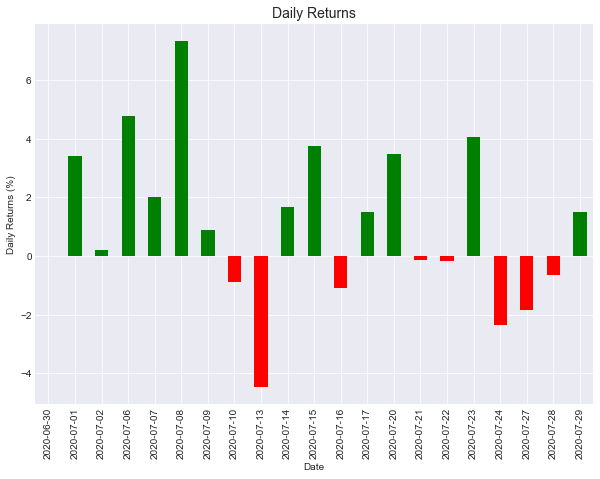

In [7]:
# Plot bar graph of daily returns
(data.daily_returns*100).plot.bar(figsize=(10, 7),
                                  color=np.where(data.daily_returns > 0,
                                                 'green', 'red'))
plt.title("Daily Returns", fontsize=14)
plt.ylabel('Daily Returns (%)')
plt.show()

Based on the graph of daily returns, you can see that the highest daily return was on July 8. Similarly, the lowest daily return was on July 13. You can also say the range of daily returns is (7.5 - (-4.2)) = 11.7.

---
<a id='time'></a>
### Are daily returns time additive?

How will you compute the total returns using the daily returns? Should you add or multiply. First you will try if addition of daily returns gives you the total returns.

To find out, we will use the `sum()` function and compare it with the full period returns we had calculated earlier in the notebook.

`dataframe.sum()`: It can be used to take the sum of all elements.

In [7]:
# Calculate sum of all daily returns
sum_of_daily_returns = data.daily_returns.sum()
'The sum of daily returns percentage is %.2f%%' % (sum_of_daily_returns*100)

'The sum of daily returns percentage is 22.96%'

This does not match with the full period returns above, which was 24.74%. Thus, daily returns are not time additive.

How to get total returns from daily returns?
Instead of addition, we would multiply the daily returns.

<a id='cumulative'></a> 
## Compute cumulative returns
We will multiply the daily returns to get the total or cumulative returns. Before we multiply, we will add 1 to the daily returns so that our total is in relation to 1 as the initial investment and not 0.

`dataframe.prod()`: It can be used to multiply all elements.

In [8]:
# Add 1 to daily returns
data['daily_returns_plus_1'] = data.daily_returns + 1
# Multiply all daily returns to get the total returns
prod_of_daily_returns_plus_1 = data['daily_returns_plus_1'].prod()
# Display total returns
'Product of daily returns is %.2f%%' % ((prod_of_daily_returns_plus_1-1)*100)

'Product of daily returns is 24.74%'

You can see that the cumulative product matches the total returns which were computed earlier.

---
<a id='plot'></a> 
## Cumulative arithmetic returns vs compounded returns

To check the difference between the cumulative sum and the cumulative product, we will plot both in the same graph.

The following methods/properties are used

1. `dataframe.cumsum()`: It can be used to get the cumulative sum.
2. `dataframe.cumprod()`: It can be used to get the cumulative product.

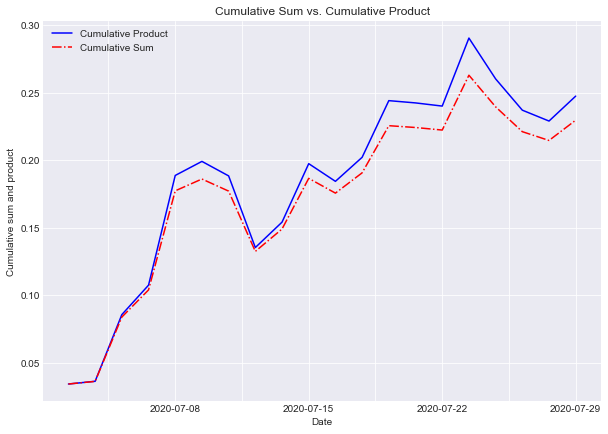

In [9]:
((data.daily_returns+1).cumprod()-1).plot(figsize=(10, 7),
                                          label='Cumulative Product',
                                          color='blue')
(data['daily_returns'].cumsum()).plot(figsize=(10, 7), label='Cumulative Sum',
                                      color='red', style='-.')
plt.title('Cumulative Sum vs. Cumulative Product')
plt.ylabel('Cumulative sum and product')
plt.legend()
plt.show()

The cumulative product is the correct method when compared with the cumulative sum. Daily returns are small in magnitude and hence might seem insignificant in the above graph, but this is because the dataset is of only one month. When your backtesting data comprises years or even decades of data, the difference between cumulative sum and product will become significant.

<a id='tweak'></a>
## Conclusion

We learnt how to calculate and plot the cumulative product to visualise the price journey of the asset.

In the next unit, you will be implementing parts of the code presented in the notebook through interactive exercises.